In [1]:
#Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install requests pandas numpy matplotlib


# TODOLIST
# - Study brainwave wavelengths, produce material to explain theory
# - Grab a few nice screenies as example
# - Real-time connection with streams?
# - How to read spectrograms?
# DONE: - Need to normalize recording time, so each recording would be same length. 10 minutes would probably do nicely.
# DONE: - To plot them together, I'd need to normalize the timeline, too, starting from 0, then based on offset (timestamp)


     |████████████████████████████████| 10.6 MB 2.0 MB/s eta 0:00:01    |███████████████▊                | 5.2 MB 2.0 MB/s eta 0:00:03     |███████████████████▎            | 6.3 MB 2.0 MB/s eta 0:00:03
     |████████████████████████████████| 15.3 MB 1.5 MB/s eta 0:00:01    |███                             | 1.5 MB 1.3 MB/s eta 0:00:11     |██████▊                         | 3.2 MB 1.3 MB/s eta 0:00:10
     |████████████████████████████████| 8.5 MB 967 kB/s eta 0:00:01
     |████████████████████████████████| 510 kB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 60 kB 808 kB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 5.4 MB/s eta 0:00:01     |█████▎                          | 358 kB 5.4 MB/s eta 0:00:01
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.4/libexec/bin/python3.8 -m pip install --upgrade pip' command.


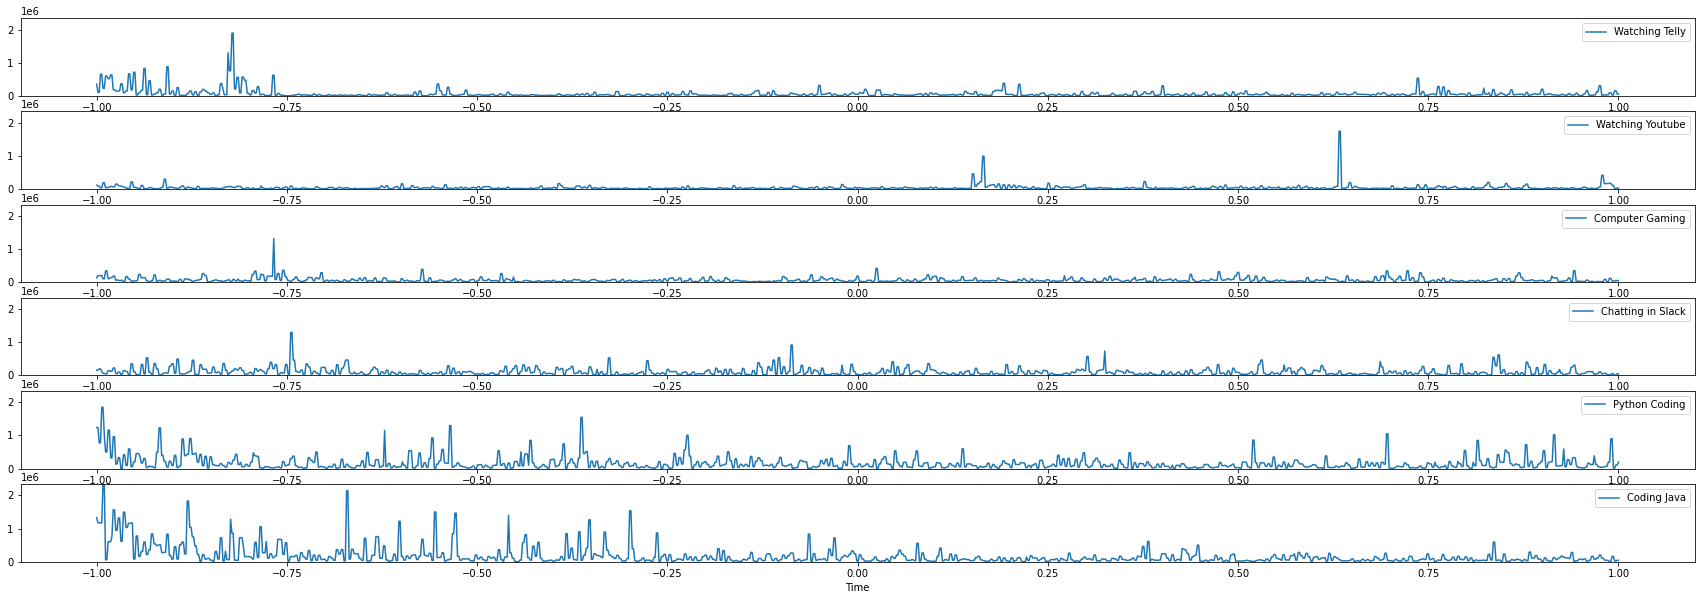

In [3]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib inline
from matplotlib.pyplot import figure

data_paths = [
    {
        'name': 'Watching Telly',
        'path': 'arto_watching_tv_2020-06-02T10:51:09.dat'
    },
    {
        'name': 'Watching Youtube',
        'path': 'arto_watching_youtube_3_2020-04-07T09:04:04.dat'
    },
    {
        'name': 'Computer Gaming',
        'path': 'arto_gaming_2020-04-07T09:24:21.dat'
    },    
    {
        'name': 'Chatting in Slack',
        'path': 'arto_chatting_slack_2020-03-24T09:48:28.dat'
    },
    {
        'name': 'Python Coding',
        'path': 'arto_coding_python_2020-03-31T09:57:06.dat'
    },
    {
        'name': 'Coding Java',
        'path': 'arto_coding_java_3_2020-05-19T08:54:02.dat'
    },
]

def read_and_fix_data(path):
    """
    Read csv file, normalize timestamp to a new column, Time, 
    so that timescale is comparable
    """
    df = pd.read_csv(path,header=0)
    df['Timestamp'] = pd.to_datetime(df['Timestamp']).astype('int64')
    max_a = df.Timestamp.max()
    min_a = df.Timestamp.min()
    min_norm = -1
    max_norm =1
    df['Time'] = (df.Timestamp- min_a) *(max_norm - min_norm) / (max_a-min_a) + min_norm    
    return df


def plot_df(df, ax, stat, label):
    df.plot(kind='line',
        x='Time',
        y=stat,
#        title=label,
        label=label,
#        color=color,
        sharey=True,
        ax=ax)

    
#print(plt.style.available)
#plt.style.use('dark_background') 
#plt.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=2)

number_of_entries = len(data_paths)

plt.rcParams['figure.figsize'] = [10/2.54, 8/2.54]
fig, ax = plt.subplots(figsize=(30,10),ncols=1,nrows=number_of_entries)

#fig = plt.gcf()
#ax = plt.gca()

# Harmonize range so values are comparable



max_y_value = 0
df = []

# Meditation, Attention, delta, theta, low-alpha, high-alpha, low-beta, high-beta, low-gamma, mid-gamma
brainwave_type='theta'
for idx, entry in enumerate(data_paths):
    df.append(read_and_fix_data(entry['path']))
    series_max = df[idx][brainwave_type].max()
    if series_max > max_y_value:
        max_y_value = series_max
    plot_df(df[idx], ax[idx], brainwave_type, entry['name'])

#Harmonize scale so we can easier compare charts
#max_y_value = 100000
for i in range(0,number_of_entries):
    ax[i].set_ylim([0,max_y_value])

# Take a picture, it will last longer!    
fig.savefig('ThetaComparison.png',format="png")    
    
plt.show()

#plt.close()


In [69]:
#fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))
#xfmt = md.DateFormatter('%M:%S')
#ax1.xaxis.set_major_formatter(xfmt)
#ax1.xaxis_date()
#ax1.plot(eeg.index, eeg.raw); ax1.set_title('Raw EEG')
#ax2.specgram(eeg['Raw'], Fs=25); ax2.set_title('Spectrogram'); ax2.set_ylabel('Freq (Hz)');
#ax2.set_xlabel('Time (s)');




(array([[1.63481807e+04, 1.52928007e+04, 1.71042388e+04, ...,
         1.72914545e+04, 1.80422209e+04, 2.06900089e+04],
        [9.09659337e+03, 7.64880162e+03, 8.07493400e+03, ...,
         7.75519953e+03, 6.37525585e+03, 1.07945104e+04],
        [9.63262109e+01, 1.65414720e+01, 2.47990104e+02, ...,
         1.37072940e+02, 5.05848940e+02, 1.16449225e+03],
        ...,
        [5.78684242e+01, 7.12839491e+01, 3.47442533e+01, ...,
         4.80609260e+02, 2.03754777e+02, 4.15198956e+02],
        [7.42562377e+01, 2.19464780e+01, 1.70869396e+01, ...,
         1.84444799e+01, 1.57209053e+02, 7.72369098e+01],
        [8.01901539e+01, 3.04282014e-01, 1.73883784e+00, ...,
         1.12383364e+02, 3.08846247e+01, 1.13323652e+01]]),
 array([ 0.        ,  0.09765625,  0.1953125 ,  0.29296875,  0.390625  ,
         0.48828125,  0.5859375 ,  0.68359375,  0.78125   ,  0.87890625,
         0.9765625 ,  1.07421875,  1.171875  ,  1.26953125,  1.3671875 ,
         1.46484375,  1.5625    ,  1.66015625,

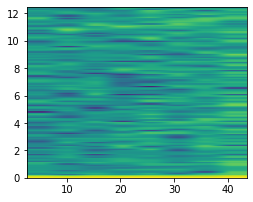

In [8]:
plt.specgram(df[0]['Raw'], Fs=25)
#plt.specgram(df[1]['Raw'], Fs=25)
#plt.specgram(df[2]['Raw'], Fs=25)
#plt.specgram(df[3]['Raw'], Fs=25)
#plt.specgram(df[4]['Raw'], Fs=25)